### Data Understanding

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df= pd.read_csv("C://Users//ASUS//Downloads//archive (2)//Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
continous_features=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
discrete_categorical=['Species']
discrete_count=['Id']

In [18]:
df[continous_features].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
Species = df.Species.value_counts().reset_index()

Species


,Species,count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


**Analyse data**

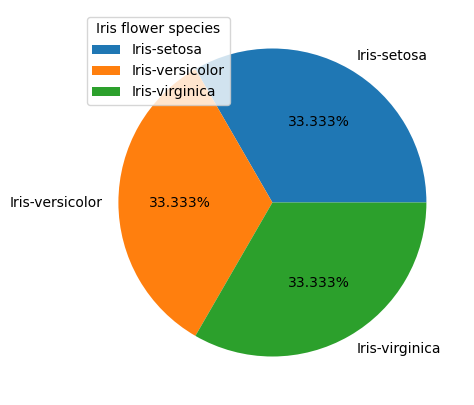

In [30]:
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(6,5))
plt.pie(Species['count'],labels=['Iris-setosa','Iris-versicolor','Iris-virginica'],autopct='%1.3f%%',explode=[0,0,0])
plt.legend(title="Iris flower species", loc='upper left')
plt.show()


### Bivariate Analysis

**Bivariate analysis examines the relationship between two variables to understand how they influence each other. It helps**

- Identify patterns and trends between variables.
- Measure strength and direction of their relationship

Text(0.5, 1.0, 'Hisstogram of Irris flower Sepal Length, by Species')

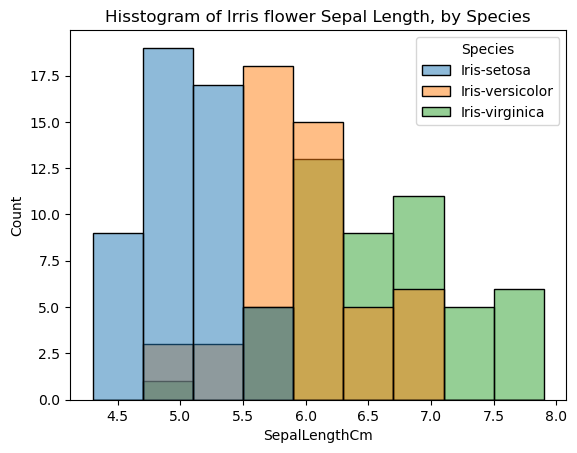

In [48]:
# Histogram
# sns.histplot(df.SepalWidthCm)

sns.histplot(data= df, x= "SepalLengthCm", hue= "Species")

plt.title("Hisstogram of Irris flower Sepal Length, by Species")


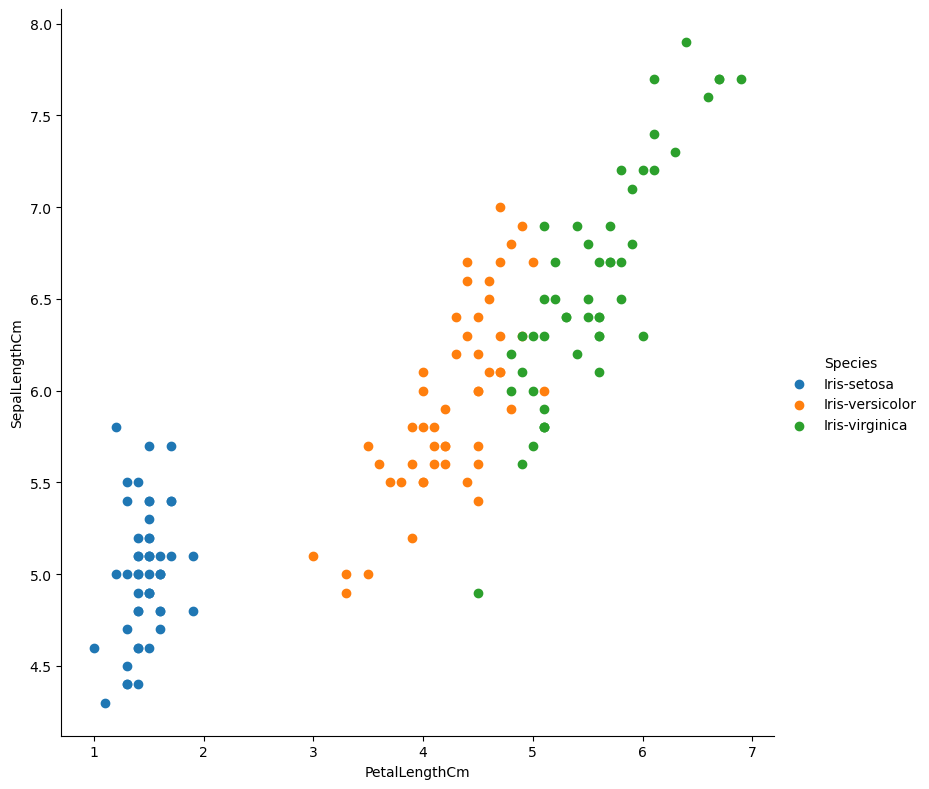

In [52]:
sns.FacetGrid(df, hue= "Species", height= 8).map(plt.scatter, "PetalLengthCm", "SepalLengthCm").add_legend()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2208\4276682380.py:3: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data= df, x= "Species", y= "PetalLengthCm", jitter= True, edgecolor= "gray")


<Axes: xlabel='Species', ylabel='PetalLengthCm'>

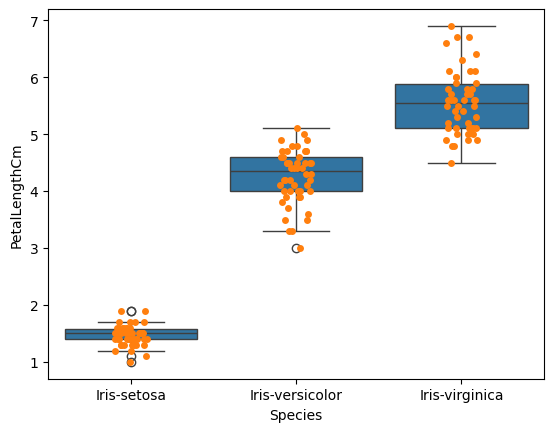

In [54]:
# raw data distribution in a simple way
sns.boxplot(data= df, x= "Species", y= "PetalLengthCm")
sns.stripplot(data= df, x= "Species", y= "PetalLengthCm", jitter= True, edgecolor= "gray")

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

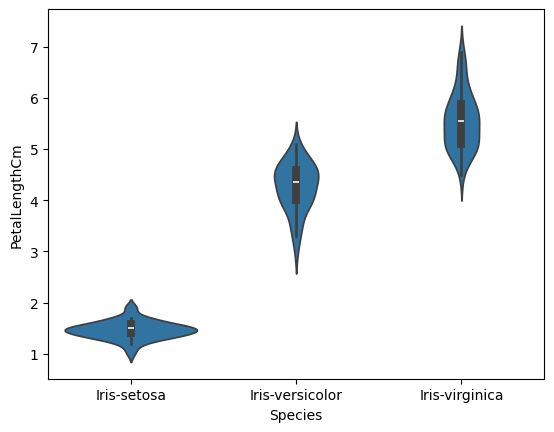

In [60]:

sns.violinplot(data= df, x= "Species", y= "PetalLengthCm")


In [ ]:
# Shape of the Data: The wider the plot, the more data points in that range.
# Central Tendency: A white dot shows the median.
# Spread: The thick black bar in the middle shows the interquartile range (IQR).
# Outliers: Thin lines (or "whiskers") extend to show the data range

C:\Users\ASUS\OneDrive\data science by SRK\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


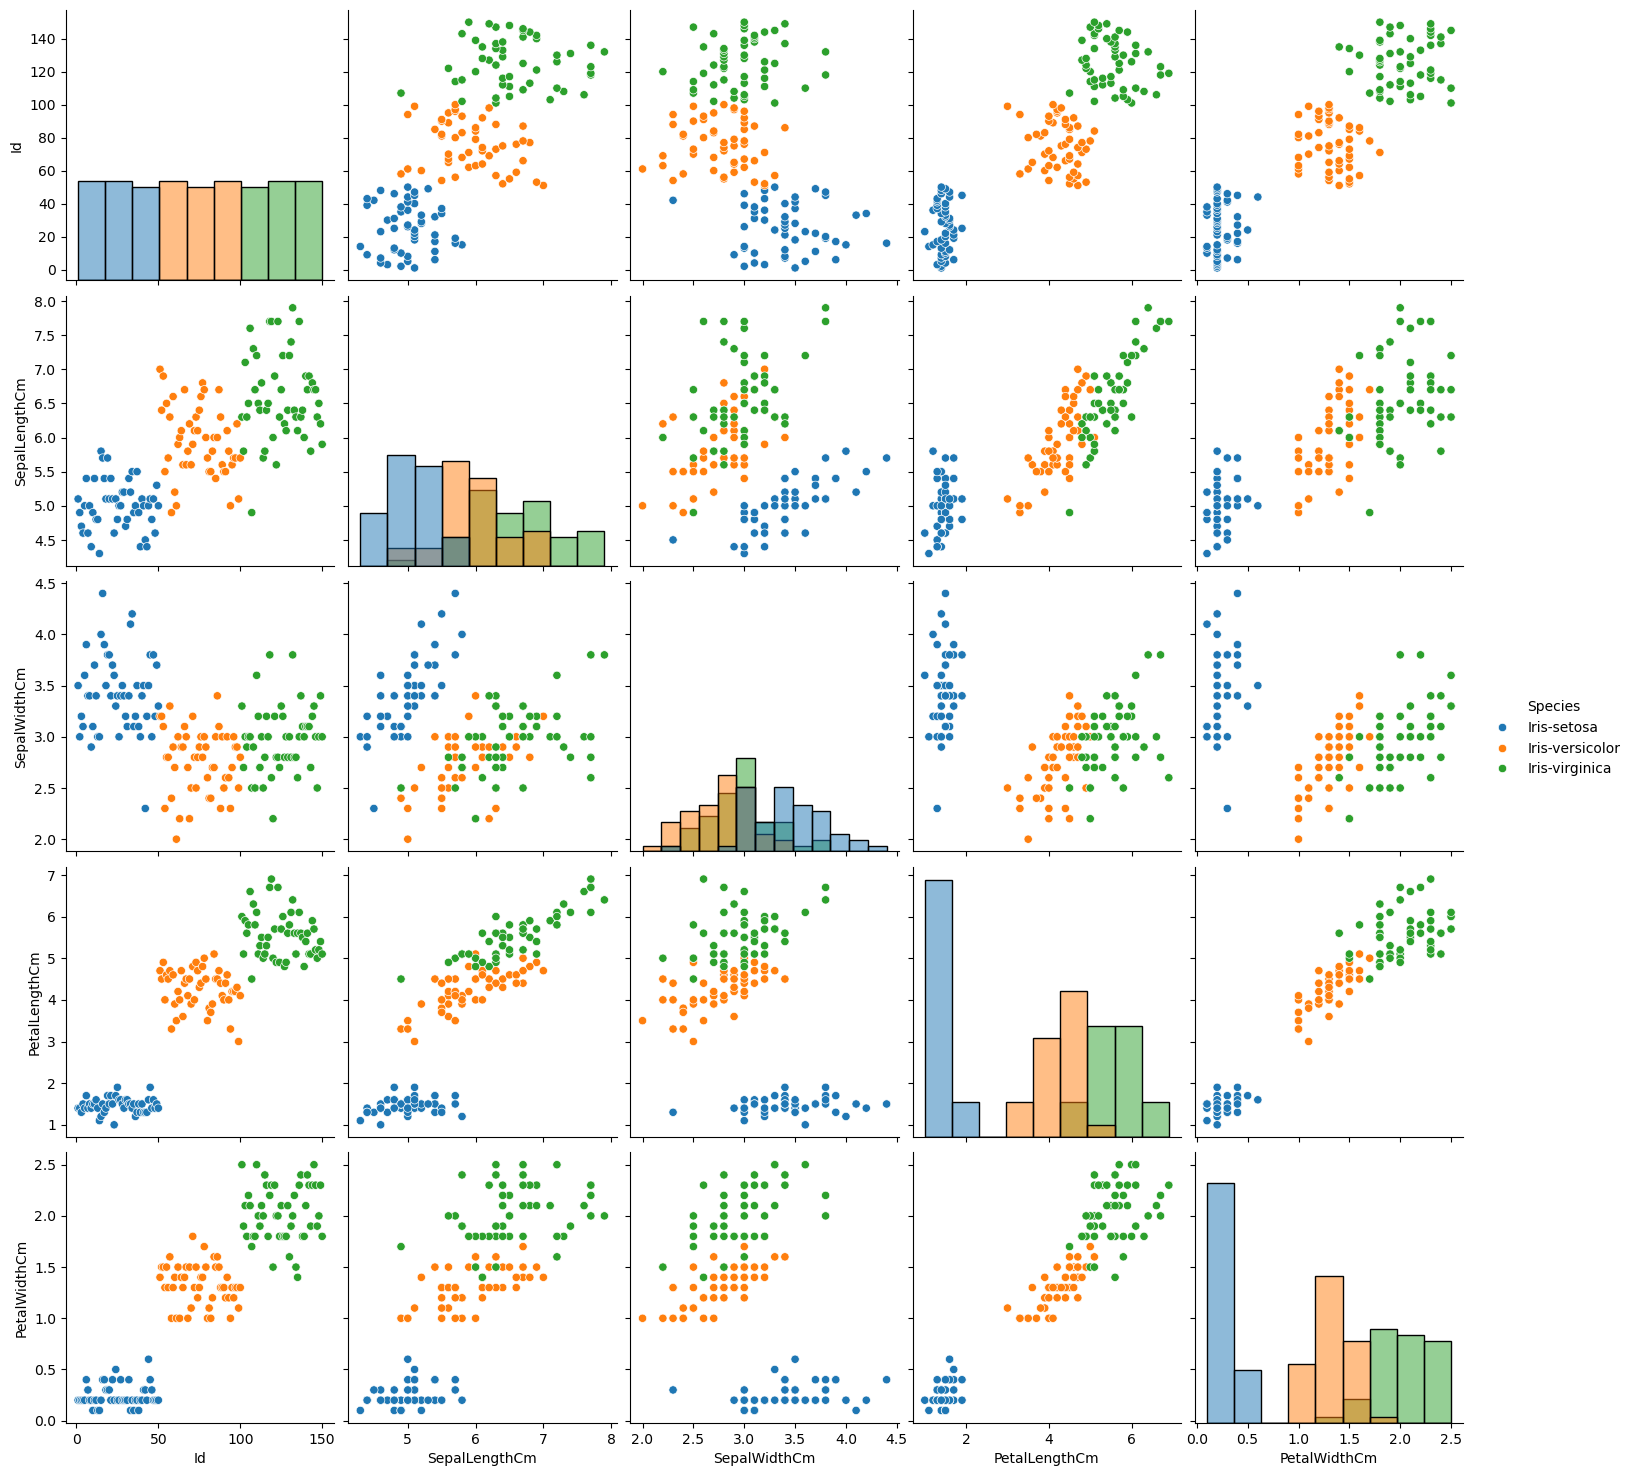

In [66]:
sns.pairplot(df, hue="Species", size=3, diag_kind="hist")
# pairplot = All-in-one scatter plot grid to explore numeric relationships

array([[<Axes: title={'center': 'Id'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>,
        <Axes: >]], dtype=object)

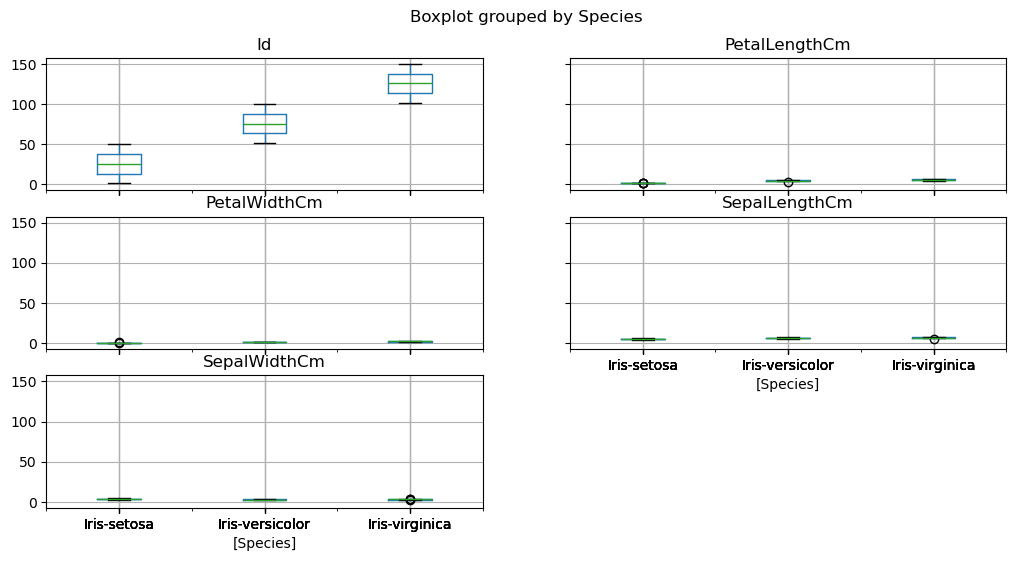

In [68]:
df.boxplot(by= "Species", figsize= (12, 6))

In [72]:
# Define
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = df["Species"]


In [74]:
#scaling
scaler = StandardScaler().fit(X)
X_transform = scaler.transform(X)


In [80]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)


In [84]:
#modeling 
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, train_size = 0.8, test_size = 0.2, random_state=0)
print(type(y_train))

<class 'numpy.ndarray'>


In [94]:
#Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix

def evaluate_results(y_test, y_pred):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return accuracy, precision, recall, f1


In [96]:
# DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score


def get_mae(max_leaf_nodes, X_train, X_val, y_train, y_val):
    model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_val)
    mae = mean_absolute_error(y_val, preds_val)
    return mae

for max_leaf_nodes in [3, 5, 15]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_val, y_train, y_val)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 3  		 Mean Absolute Error:  0
Max leaf nodes: 5  		 Mean Absolute Error:  0
Max leaf nodes: 15  		 Mean Absolute Error:  0


Validation Accuracy for DecisionTreeClassifier: 1.00
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


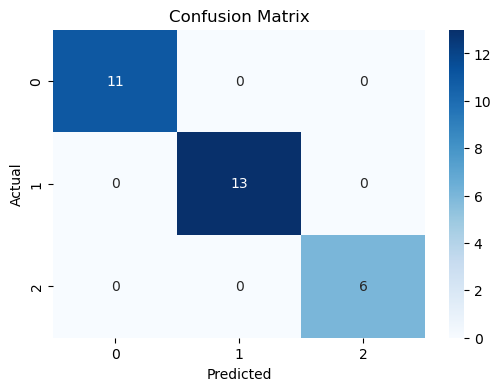

In [98]:
# DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_leaf_nodes= 5, random_state= 0)
model.fit(X_train, y_train)
preds_val = model.predict(X_val)

# Evaluate
accuracy = accuracy_score(y_val, preds_val)
print(f"Validation Accuracy for DecisionTreeClassifier: {accuracy:.2f}")

accuracy_dt = evaluate_results(y_val, preds_val)

Validation Accuracy for RandomForestClassifier: 1.00
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


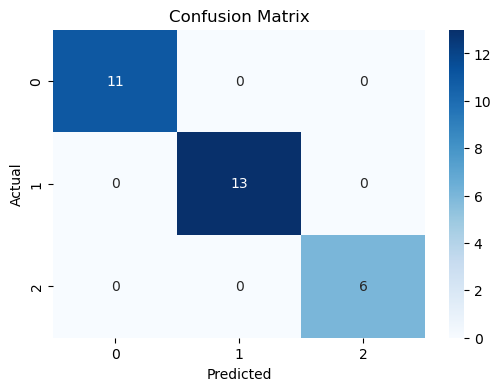

In [100]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state= 0)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_val)

# Evaluate
accuracy = accuracy_score(y_val, rf_preds)
print(f"Validation Accuracy for RandomForestClassifier: {accuracy:.2f}")

accuracy_rf = evaluate_results(y_val, rf_preds)


SVM (Support Vector Machine) in Simple Terms¶

SVM is a powerful algorithm for classification (like spam vs. not spam) and regression (predicting numbers). Here's how it works:

- Clear Boundaries: It finds the best line (or hyperplane in higher dimensions) to separate data points into categories.
- Handles Complex Data: If data isn't linearly separable, it uses "kernels" to handle more complex shapes.
- Focuses on Important Points: Only uses key points (called support vectors) to define the boundary, making it efficient.
- Prevents Overfitting: Maximizes the margin between classes, helping it perform well on new data.

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


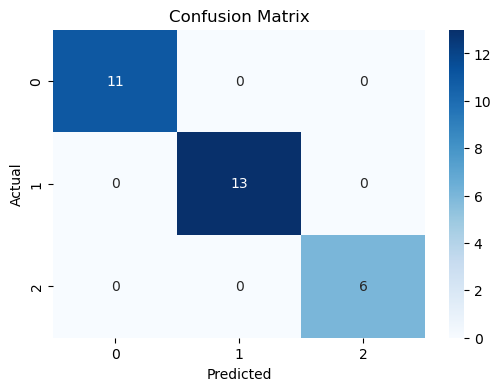

In [106]:
 #SVM (Support Vector Machine)

from sklearn.svm import SVC

svm = SVC(kernel= "linear", C= 1.0, decision_function_shape= "ovr")
svm.fit(X_train, y_train)

svm_preds = svm.predict(X_val)

accuracy_svm = evaluate_results(y_val, svm_preds)


**K-Nearest Neighbors (KNN) in Simple Terms**¶=>KNN is a simple algorithm used for classification and regression. It works by looking at the nearest neighbors to a data point and assigning it the majority class (for classification) or average value (for regression) of those neighbors.

Key Points:

- No Training Needed: KNN doesn't need a training step, it just memorizes the data and makes predictions based on it.- Works with Irregular Data: It’s good for data that isn't easy to separate or is noisy.- Non-Parametric: KNN doesn't assume anything about the data’s distribution, so it's flexible and robust to outliers.- Improves with More Data: KNN performs better as more data is available since it uses local information (neighbors).

In short, KNN is simple, flexible, and works well when there are no clear patterns in the data




ta.



Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


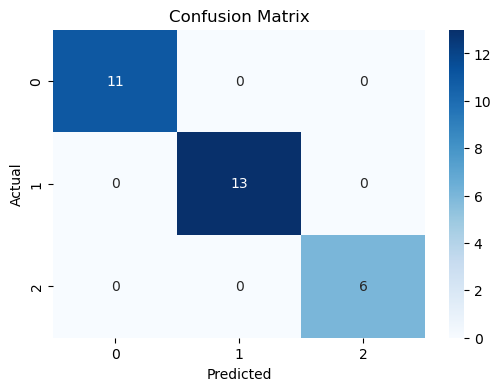

In [119]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, y_train)

knn_preds = knn.predict(X_val)

accuracy_knn = evaluate_results(y_val, knn_preds)

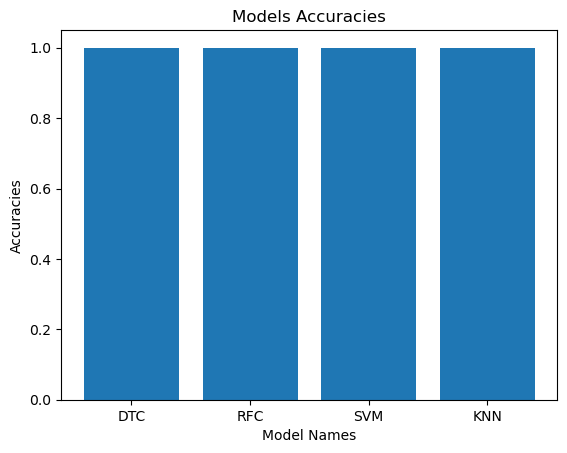

In [121]:
model_names = ["DTC", "RFC", "SVM", "KNN"]
accuracies = [accuracy_dt[0], accuracy_rf[0], accuracy_svm[0], accuracy_knn[0]]

plt.bar(model_names, accuracies)
plt.title("Models Accuracies")
plt.xlabel("Model Names")
plt.ylabel("Accuracies")
plt.show()


In [123]:
from joblib import dump
dump(model,'Iris_model.joblib')    # dump(model name,name to saved)


['Iris_model.joblib']